# Students data

## Tasks


-	Explain how Mother or Father education affect grade ( Final Grade G3) if any?

-	Explain relation between absent and G3?

-	Explain Correlation between features and G3? And write your conclusion about result.
-	If you want to do feature selection what features you select or removed and why according to your analysis.
-	By data given check if you can predict G3 easily or data is not enough to do this task?
-	Is grade is related to school or not?


In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

np.__version__

import seaborn as sns

from scipy import stats

In [2]:
pd.__version__


'1.3.5'

In [3]:
data = pd.read_csv("student_data.csv")
data.sample(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
33,GP,M,15,U,LE3,T,3,3,other,other,...,5,3,2,1,1,2,0,8,10,12
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
160,GP,M,17,R,LE3,T,2,1,at_home,other,...,3,3,2,2,2,5,0,7,6,0
338,GP,F,18,U,LE3,T,3,3,services,services,...,5,3,3,1,1,1,7,16,15,17
57,GP,M,15,U,GT3,T,4,4,teacher,health,...,3,2,2,1,1,5,4,14,15,15


## Assesing Data

In [4]:
data.shape

(395, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data.isnull()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
391,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
392,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
393,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [8]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [9]:
data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [10]:
len(data.columns)

33

### Getting the numerical data and non numerical data alone out of the data

In [11]:
numerical_data = {}
non_numerical_data = {}
for i,j in zip(data,data.dtypes):
    if(j == 'int64'):
      numerical_data[i] = data[i]
    else:
      non_numerical_data[i] = data[i]

      
numerical_data = pd.DataFrame(numerical_data)
non_numerical_data = pd.DataFrame(non_numerical_data)
non_numerical_data.dtypes


school        object
sex           object
address       object
famsize       object
Pstatus       object
Mjob          object
Fjob          object
reason        object
guardian      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
dtype: object

## Visualized data

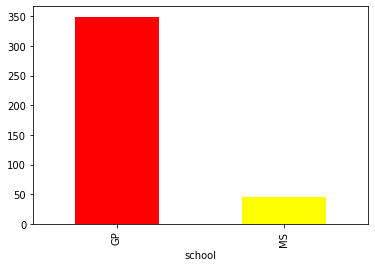

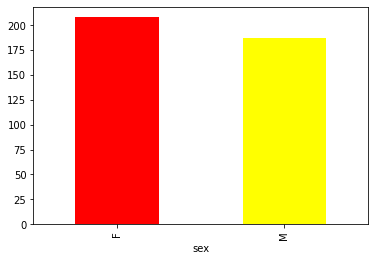

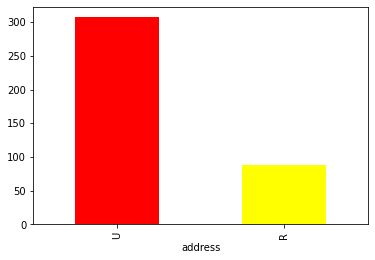

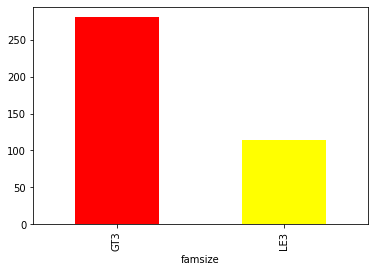

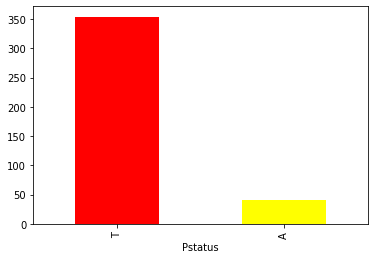

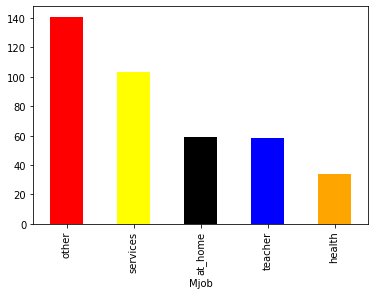

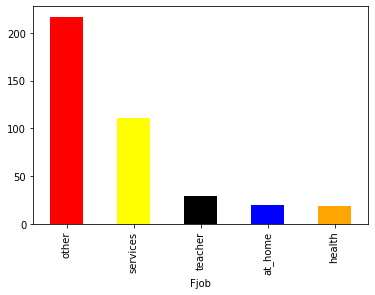

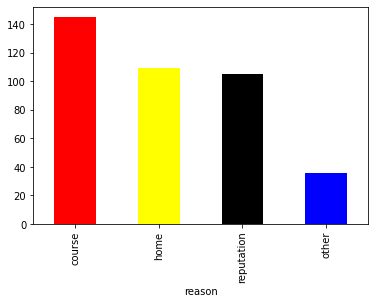

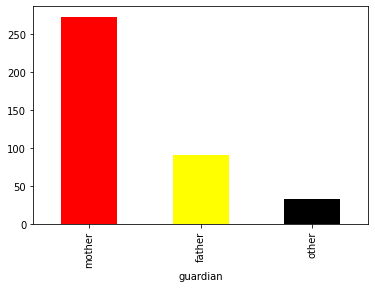

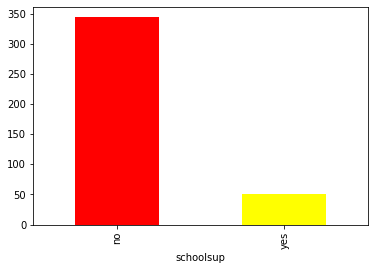

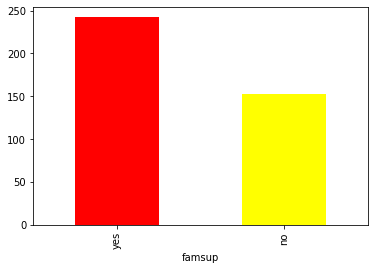

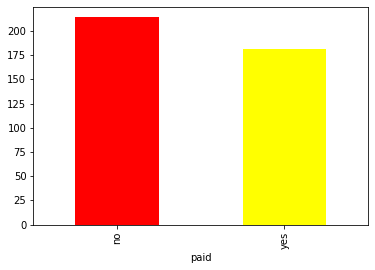

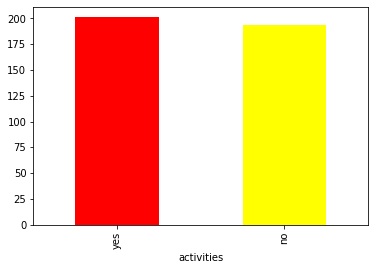

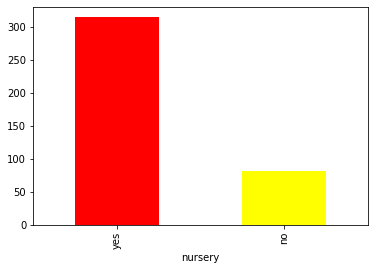

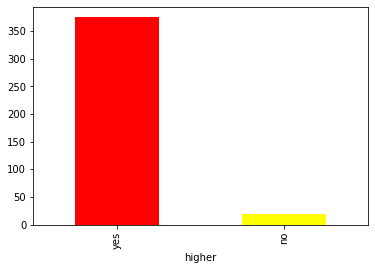

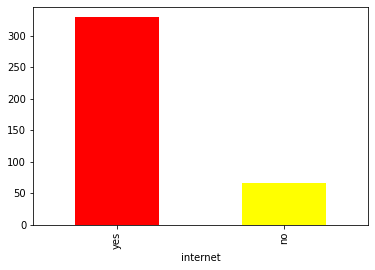

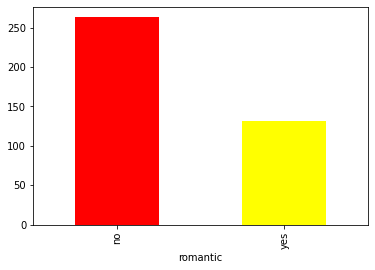

In [12]:
c = ['red', 'yellow', 'black', 'blue', 'orange']
for i in non_numerical_data.columns:
  non_numerical_data[i].value_counts().plot.bar(color = c) 
  plt.xlabel(i)
  plt.show()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f49064fd0d0>,
      dtype=object)

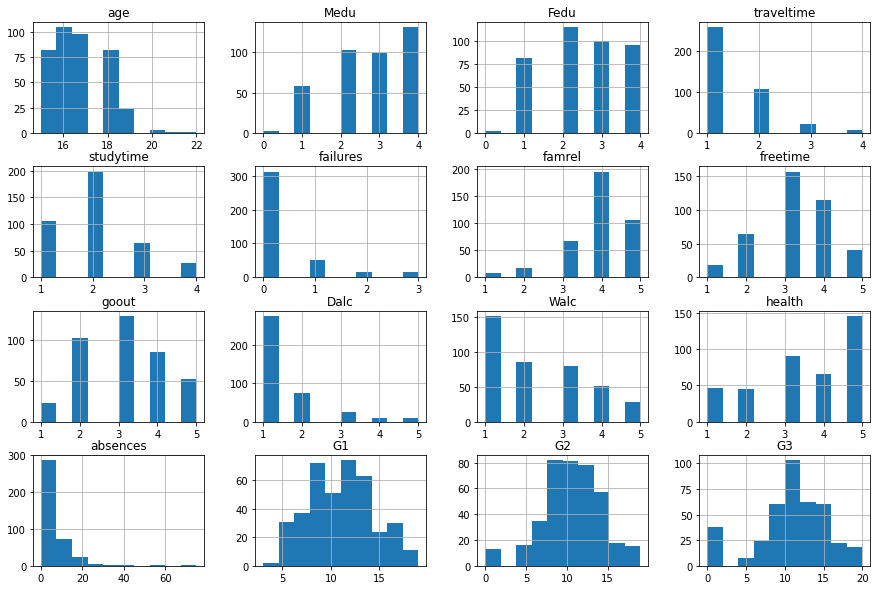

In [13]:
fig = plt.figure(figsize = (15,10))
ax = fig.gca()
data.hist(ax =ax)

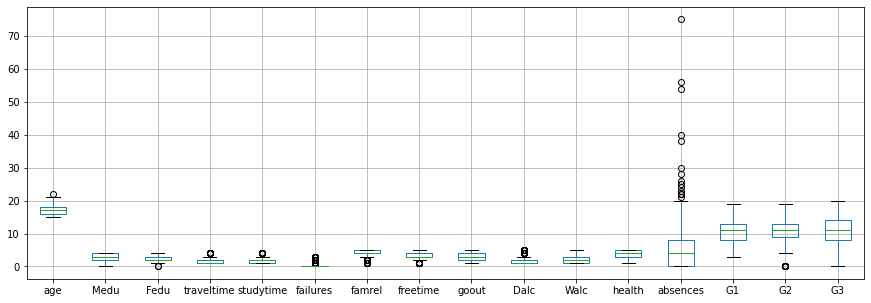

In [14]:
fig = plt.figure(figsize = (15,5))
ax = fig.gca()
data.boxplot()

In [15]:
data_subset = data[['school','G3','guardian','absences']]

In [49]:
counts = data_subset['school'].value_counts()

<Figure size 720x720 with 0 Axes>

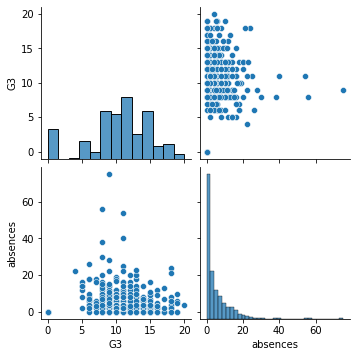

In [16]:
fig = plt.figure(figsize = (10,10))
sns.pairplot(data_subset)

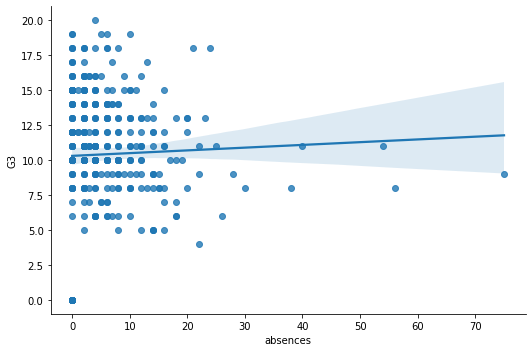

In [17]:
sns.lmplot(x = 'absences',y = 'G3',data = data,aspect = 1.5)

### Correltaion between variables

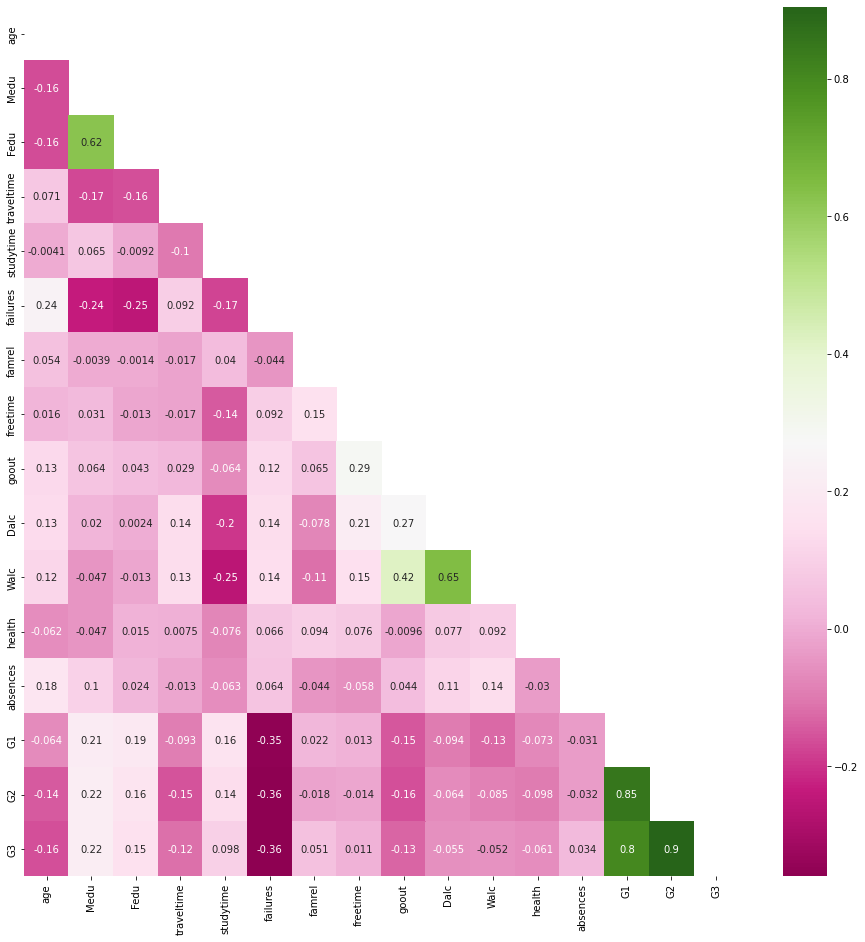

In [18]:
plt.figure(figsize=(16,16))

mask = np.triu(np.ones_like(data.corr()))

sns.heatmap(data.corr(),annot = True, mask =mask,cmap = 'PiYG',)

plt.show()

In [19]:
 y = data['G3']
 data = data.drop(columns = ['G3'])


In [20]:
X = data.copy()
X = pd.get_dummies(X,drop_first = True)
X.shape
X.sample(10)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
69,15,3,1,2,4,0,4,4,2,2,...,0,0,0,1,0,0,0,1,1,0
300,18,4,4,1,2,0,4,2,4,1,...,1,0,0,1,0,0,1,1,1,1
141,16,2,2,2,1,2,2,3,3,2,...,0,0,0,1,0,1,1,1,1,0
362,18,3,3,2,2,0,4,3,2,1,...,1,0,0,1,0,0,1,1,1,1
74,16,3,3,1,2,0,4,3,3,2,...,1,0,1,1,1,1,1,1,1,0
63,16,4,3,1,3,0,3,4,4,2,...,1,0,1,1,1,1,1,1,1,0
351,17,3,3,2,2,0,4,5,4,2,...,1,0,0,1,1,0,1,1,1,0
385,18,2,2,2,3,0,5,3,3,1,...,1,0,0,0,1,0,1,1,0,0
143,16,1,1,1,1,0,3,4,4,3,...,1,0,0,0,0,0,1,1,1,0
167,16,4,2,1,2,0,4,2,3,1,...,0,0,0,0,1,0,1,1,1,1


In [21]:
from sklearn.feature_selection import SelectKBest, f_regression
selk = SelectKBest(f_regression, k=11)
selk.fit(X,y)
filter = selk.get_support()
#filter = np.append(filter,False)
filter.shape


(41,)

In [22]:
filtered_columns=X.columns
filtered_columns.shape

(41,)

In [23]:
for cols in  X.columns:
    if cols not in filtered_columns[filter]:
        X.drop(columns=[cols],inplace=True)

In [24]:
X.columns

Index(['age', 'Medu', 'Fedu', 'traveltime', 'failures', 'goout', 'G1', 'G2',
       'Mjob_health', 'higher_yes', 'romantic_yes'],
      dtype='object')

In [25]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=0)

In [26]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()

In [27]:
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
y_pred_train = regressor.predict(x_train)
y_pred[0]
y_pred_train[0]

9.974326875953533

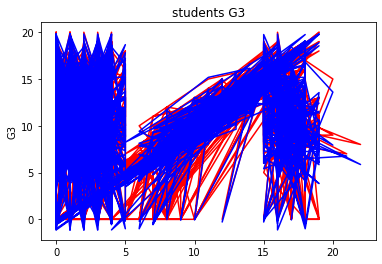

In [28]:
plt.plot(x_train, y_train, color = 'red')
plt.plot(x_train, y_pred_train, color = 'blue')
plt.title('students G3')
plt.ylabel('G3')
plt.show()

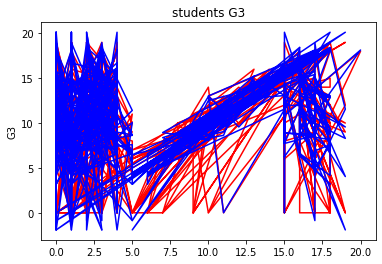

In [29]:
plt.plot(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('students G3')
plt.ylabel('G3')
plt.show()

In [30]:
from sklearn.metrics import max_error
max_error(y_test,y_pred) 

9.25836924136971

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=10, criterion = 'entropy' ,random_state = 0 )
classifier.fit(x_train,y_train)
y_predict = classifier.predict(x_test)


In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
accuracy = (int(cm[0,0])+int(cm[1,1]))/len(y_predict)
accuracy

0.05063291139240506

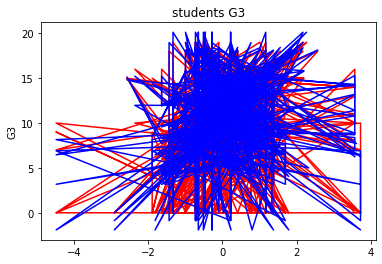

In [34]:
plt.plot(x_test, y_test, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('students G3')
plt.ylabel('G3')
plt.show()